<a href="https://colab.research.google.com/github/mvadrev/Tensorflow/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip images.zip

unzip:  cannot find or open chest.zip, chest.zip.zip or chest.zip.ZIP.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image


In [2]:
base_dir = "images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_PNEUMONIA = os.path.join(train_dir, "PNEUMONIA")
val_PNEUMONIA = os.path.join(validation_dir, "PNEUMONIA")
train_NORMAL = os.path.join(train_dir, "NORMAL")
val_NORMAL = os.path.join(validation_dir, "NORMAL")

num_PNEUMONIA_train = len(os.listdir(train_PNEUMONIA))
num_NORMAL_train = len(os.listdir(train_NORMAL))
num_PNEUMONIA_val = len(os.listdir(val_PNEUMONIA))
num_NORMAL_val = len(os.listdir(val_NORMAL))

total_train = num_PNEUMONIA_train+num_NORMAL_train
total_val = num_PNEUMONIA_val + num_NORMAL_val

FileNotFoundError: ignored

In [0]:
batch_size = 32
img_shape = 224  # Mobile Net image dimensions

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_image_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(img_shape, img_shape), class_mode="binary")

val_image_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size, directory=validation_dir, shuffle=False, target_size=(img_shape, img_shape), class_mode="binary")

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

mobile_net = hub.KerasLayer(URL, input_shape=(img_shape, img_shape, 3))
mobile_net.trainable = False

model = tf.keras.models.Sequential([
    mobile_net,
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
epochs = 10

history = model.fit_generator(
    train_image_gen,
    steps_per_epoch=int(np.ceil(total_train/float(batch_size))),
    epochs=epochs,
    validation_data=val_image_gen,
    validation_steps=int(np.ceil(total_val/float(batch_size)))
)

Epoch 1/10
63/63 [==============================] - 11s 167ms/step - loss: 0.0406 - acc: 0.9880 - val_loss: 0.0445 - val_acc: 0.9860
Epoch 2/10
63/63 [==============================] - 9s 151ms/step - loss: 0.0317 - acc: 0.9895 - val_loss: 0.0450 - val_acc: 0.9840
Epoch 3/10
63/63 [==============================] - 10s 155ms/step - loss: 0.0234 - acc: 0.9940 - val_loss: 0.0430 - val_acc: 0.9860
Epoch 4/10
63/63 [==============================] - 10s 155ms/step - loss: 0.0195 - acc: 0.9965 - val_loss: 0.0432 - val_acc: 0.9860
Epoch 5/10
63/63 [==============================] - 9s 148ms/step - loss: 0.0163 - acc: 0.9970 - val_loss: 0.0432 - val_acc: 0.9860
Epoch 6/10
63/63 [==============================] - 10s 154ms/step - loss: 0.0133 - acc: 0.9990 - val_loss: 0.0444 - val_acc: 0.9850
Epoch 7/10
63/63 [==============================] - 10s 153ms/step - loss: 0.0110 - acc: 0.9990 - val_loss: 0.0456 - val_acc: 0.9850
Epoch 8/10
63/63 [==============================] - 10s 152ms/step - lo

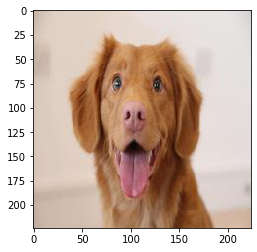

In [0]:
IMG_SIZE = 224

img = Image.open('./g.jpg')  # image extension *.png,*.jpg
new_width = 224
new_height = 224
img = img.resize((new_width, new_height), Image.ANTIALIAS)
# format may what u want ,*.png,*jpg,*.gif
img.save('gs.jpg')

img = plt.imread("./gs.jpg")
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [0]:
print(img.shape)
print(type(img))

(224, 224, 3)
<class 'numpy.ndarray'>


In [0]:
print(img.shape)
img2 = np.expand_dims(img, axis=0)

print(img2.shape)
predictions = model.predict(img2)
print(predictions)

(224, 224, 3)
(1, 224, 224, 3)
[[0.946846   0.05315401]]


In [0]:
!pip install -q pyyaml h5py

In [0]:
model.save('mymodel.h5') 